In [78]:
# 1. Importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [2]:
# 2. Loading the dataset:
df = pd.read_excel('emdat_public_2023_04_04.xlsx')

In [3]:
df

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1932-9001-SUN,1932,9001,NaN,Complex Disasters,Complex Disasters,Complex Disasters,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.672498,NaN,NaN,NaN,NaN
1,1931-0007-CHN,1931,7,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,NaN,NaN,NaN,1400000.0,26881069.0,5.208126,NaN,NaN,NaN,NaN
2,1928-9002-CHN,1928,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.880510,NaN,NaN,NaN,NaN
3,1917-0002-SUN,1917,2,NaN,Natural,Biological,Epidemic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.387590,NaN,NaN,NaN,NaN
4,1920-0001-IND,1920,1,NaN,Natural,Biological,Epidemic,Bacterial disease,NaN,Bubonic,...,NaN,NaN,NaN,NaN,NaN,6.860595,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25891,2022-9524-CHN,2022,9524,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,7600000.0,7600000.0,100.000000,1,898;900;911;912;914;924,NaN,"Anhui Sheng, Chongqing Shi, Hubei Sheng, Hunan..."
25892,2001-9854-NAM,2001,9854,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,60.503579,2,NaN,22320,Ruacana (Adm2).
25893,2000-9860-HND,2000,9860,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.840648,2,NaN,17308,Marale (Adm2).
25894,2000-9860-NIC,2000,9860,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.840648,1,2185;2193;2199,NaN,"Atlantico Norte, Jinotega, Nueva Segovia (Adm1)."


###  3. Data Cleaning

In [4]:
df1 = df.copy()

In [5]:
# a. Handling null values for the target:
df1.dropna(subset=["Total Damages, Adjusted ('000 US$)"], inplace=True)  # For numerical columns

In [6]:
# b. Dropping unnecessary columns:
cols_to_drop = ['Dis No', 'Glide', 'Event Name', 'Admin1 Code', 'Admin2 Code', 'Geo Locations', 'Seq', 'Origin', 'Disaster Subtype', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration','River Basin', 'Local Time', 'Latitude', 'Longitude']
df1.drop(cols_to_drop, axis=1, inplace=True)
df1.head()

,Year,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subsubtype,Country,ISO,Region,Continent,Location,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level
1,1931,Natural,Hydrological,Flood,NaN,China,CHN,Eastern Asia,Asia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1400000.0,26881069.0,5.208126,NaN
9,1965,Natural,Climatological,Drought,NaN,India,IND,Southern Asia,Asia,Nationwide except south,...,NaN,100000000.0,NaN,NaN,NaN,NaN,100000.0,928817.0,10.766379,NaN
20,1970,Natural,Meteorological,Storm,NaN,Bangladesh,BGD,Southern Asia,Asia,"Khulna, Chittagong",...,NaN,3648000.0,NaN,NaN,NaN,NaN,86400.0,651265.0,13.266480,NaN
22,1976,Natural,Geophysical,Earthquake,NaN,China,CHN,Eastern Asia,Asia,"Tangshan, Pek.,Tientsin",...,NaN,164000.0,NaN,NaN,NaN,NaN,5600000.0,28798371.0,19.445544,NaN
23,2010,Natural,Geophysical,Earthquake,NaN,Haiti,HTI,Caribbean,Americas,"Port-au-prince, Kenscoff municipalities (Port-...",...,NaN,3700000.0,11500000.0,15434285.0,200000.0,268422.0,8000000.0,10736894.0,74.509444,2


In [7]:
# c. Handling Disaster Subsubtype nulls by using the method 'forward filling'
    # c.1. Combining the two columns into a single dataframe:
combined_df = df[['Disaster Subtype', 'Disaster Subsubtype']]

    # c.2. Applying forward filling on the 'Disaster Subsubtype' column:
combined_df['Disaster Subsubtype'].fillna(method='ffill', inplace=True)

    # c.3. Replacing the original 'Disaster Subsubtype' in the main dataframe with the updated one
df1['Disaster Subsubtype'] = combined_df['Disaster Subsubtype']
    

C:\Users\ela.apetrei\AppData\Local\Temp\ipykernel_25968\4061017263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Disaster Subsubtype'].fillna(method='ffill', inplace=True)


In [11]:
df2 = df1.copy()

In [12]:
list(df2.columns)

['Year',
 'Disaster Group',
 'Disaster Subgroup',
 'Disaster Type',
 'Disaster Subsubtype',
 'Country',
 'ISO',
 'Region',
 'Continent',
 'Location',
 'Associated Dis',
 "AID Contribution ('000 US$)",
 'Dis Mag Value',
 'Dis Mag Scale',
 'Start Year',
 'Start Month',
 'Start Day',
 'End Year',
 'End Month',
 'End Day',
 'Total Deaths',
 'No Injured',
 'No Affected',
 'No Homeless',
 'Total Affected',
 "Reconstruction Costs ('000 US$)",
 "Reconstruction Costs, Adjusted ('000 US$)",
 "Insured Damages ('000 US$)",
 "Insured Damages, Adjusted ('000 US$)",
 "Total Damages ('000 US$)",
 "Total Damages, Adjusted ('000 US$)",
 'CPI',
 'Adm Level']

In [14]:
# These column names are getting on my nerves so I'll format them:
# Format column names
# Original column names
column_names = ['Year',
 'Disaster Group',
 'Disaster Subgroup',
 'Disaster Type',
 'Disaster Subsubtype',
 'Country',
 'ISO',
 'Region',
 'Continent',
 'Location',
 'Associated Dis',
 "AID Contribution ('000 US$)",
 'Dis Mag Value',
 'Dis Mag Scale',
 'Start Year',
 'Start Month',
 'Start Day',
 'End Year',
 'End Month',
 'End Day',
 'Total Deaths',
 'No Injured',
 'No Affected',
 'No Homeless',
 'Total Affected',
 "Reconstruction Costs ('000 US$)",
 "Reconstruction Costs, Adjusted ('000 US$)",
 "Insured Damages ('000 US$)",
 "Insured Damages, Adjusted ('000 US$)",
 "Total Damages ('000 US$)",
 "Total Damages, Adjusted ('000 US$)",
 'CPI',
 'Adm Level']

# Format column names
formatted_column_names = [
    col.lower().replace(' ', '_').replace(',', '').replace("('000_us$)", '').replace('_adjusted', '_adj').rstrip('_').strip()
    for col in column_names
]

# Rename columns in the DataFrame
df2.columns = formatted_column_names

In [15]:
df2.head()

,year,disaster_group,disaster_subgroup,disaster_type,disaster_subsubtype,country,iso,region,continent,location,...,no_homeless,total_affected,reconstruction_costs,reconstruction_costs_adj,insured_damages,insured_damages_adj,total_damages,total_damages_adj,cpi,adm_level
1,1931,Natural,Hydrological,Flood,NaN,China,CHN,Eastern Asia,Asia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1400000.0,26881069.0,5.208126,NaN
9,1965,Natural,Climatological,Drought,NaN,India,IND,Southern Asia,Asia,Nationwide except south,...,NaN,100000000.0,NaN,NaN,NaN,NaN,100000.0,928817.0,10.766379,NaN
20,1970,Natural,Meteorological,Storm,NaN,Bangladesh,BGD,Southern Asia,Asia,"Khulna, Chittagong",...,NaN,3648000.0,NaN,NaN,NaN,NaN,86400.0,651265.0,13.266480,NaN
22,1976,Natural,Geophysical,Earthquake,NaN,China,CHN,Eastern Asia,Asia,"Tangshan, Pek.,Tientsin",...,NaN,164000.0,NaN,NaN,NaN,NaN,5600000.0,28798371.0,19.445544,NaN
23,2010,Natural,Geophysical,Earthquake,NaN,Haiti,HTI,Caribbean,Americas,"Port-au-prince, Kenscoff municipalities (Port-...",...,NaN,3700000.0,11500000.0,15434285.0,200000.0,268422.0,8000000.0,10736894.0,74.509444,2


In [16]:
nan_count = df2.isna().sum()
print(nan_count)

year                           0
disaster_group                 0
disaster_subgroup              0
disaster_type                  0
disaster_subsubtype          219
country                        0
iso                            0
region                         0
continent                      0
location                     448
associated_dis              3969
aid_contribution            5145
dis_mag_value               3381
dis_mag_scale                308
start_year                     0
start_month                   44
start_day                    670
end_year                       0
end_month                    125
end_day                      670
total_deaths                1299
no_injured                  3660
no_affected                 2025
no_homeless                 4504
total_affected              1254
reconstruction_costs        5595
reconstruction_costs_adj    5595
insured_damages             4703
insured_damages_adj         4703
total_damages                  0
total_dama

In [17]:
# I will want to keep df2 for EDA, with all the columns intact. But for creating the model, the data will be drawn from df3

df3 = df2.copy()

In [19]:
nan_count = df3.isna().sum()
print(nan_count)

year                           0
disaster_group                 0
disaster_subgroup              0
disaster_type                  0
disaster_subsubtype          219
country                        0
iso                            0
region                         0
continent                      0
location                     448
associated_dis              3969
aid_contribution            5145
dis_mag_value               3381
dis_mag_scale                308
start_year                     0
start_month                   44
start_day                    670
end_year                       0
end_month                    125
end_day                      670
total_deaths                1299
no_injured                  3660
no_affected                 2025
no_homeless                 4504
total_affected              1254
reconstruction_costs        5595
reconstruction_costs_adj    5595
insured_damages             4703
insured_damages_adj         4703
total_damages                  0
total_dama

In [20]:
# d. Dropping some columns which have high colinearity among each other; others just have a high amount of NaaN's and are not relevant to us
cols_to_drop = ["iso", "disaster_subsubtype", "dis_mag_value", "end_day","end_month","dis_mag_scale", "location", "year", "start_month", "start_day", "end_year", "reconstruction_costs", "insured_damages", "total_damages", "cpi", "adm_level"]
df3.drop(cols_to_drop, axis=1, inplace=True)
df3.head()    

,disaster_group,disaster_subgroup,disaster_type,country,region,continent,associated_dis,aid_contribution,start_year,total_deaths,no_injured,no_affected,no_homeless,total_affected,reconstruction_costs_adj,insured_damages_adj,total_damages_adj
1,Natural,Hydrological,Flood,China,Eastern Asia,Asia,Famine,NaN,1931,3700000.0,NaN,NaN,NaN,NaN,NaN,NaN,26881069.0
9,Natural,Climatological,Drought,India,Southern Asia,Asia,Famine,NaN,1965,1500000.0,NaN,100000000.0,NaN,100000000.0,NaN,NaN,928817.0
20,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,NaN,NaN,1970,300000.0,NaN,3648000.0,NaN,3648000.0,NaN,NaN,651265.0
22,Natural,Geophysical,Earthquake,China,Eastern Asia,Asia,NaN,NaN,1976,242000.0,164000.0,NaN,NaN,164000.0,NaN,NaN,28798371.0
23,Natural,Geophysical,Earthquake,Haiti,Caribbean,Americas,NaN,3518530.0,2010,222570.0,300000.0,3400000.0,NaN,3700000.0,15434285.0,268422.0,10736894.0


The purpose of the logic below is to fill the NaaN values for columns Total Deaths (a), No Injured (b), No Affected (c), No Homeless (d), Total Affected (e)
1) Should be filled with 0 where a, b, c or d has the same value as in e;

2) If one of a, b, c or d is missing then it should be filled with the value resulting from subtracting the sum of the available value from e;

In [21]:
# e. Dealing with NaaNs for the columns mentioned in the cell above
    # e.1. filling them for a,b,c,d columns

def fill_missing_values(row):
    total_deaths, no_injured, no_affected, no_homeless, total_affected = row['total_deaths'], row['no_injured'], row['no_affected'], row['no_homeless'], row['total_affected']
    available_values = [v for v in [total_deaths, no_injured, no_affected, no_homeless] if v is not None]
    
    if len(available_values) == 3:
        missing_value = total_affected - sum(available_values)
        if missing_value in available_values:
            return 0
        else:
            return missing_value
    else:
        return 0

for column in ['total_deaths', 'no_injured', 'no_affected', 'no_homeless']:
    df3[column] = df3.apply(fill_missing_values, axis=1).where(df3[column].isnull(), df3[column])

print(df3)

      disaster_group disaster_subgroup disaster_type  \
1            Natural      Hydrological         Flood   
9            Natural    Climatological       Drought   
20           Natural    Meteorological         Storm   
22           Natural       Geophysical    Earthquake   
23           Natural       Geophysical    Earthquake   
...              ...               ...           ...   
25874        Natural      Hydrological         Flood   
25876        Natural    Meteorological         Storm   
25888        Natural    Climatological       Drought   
25890        Natural    Climatological       Drought   
25891        Natural    Climatological       Drought   

                          country          region continent  \
1                           China    Eastern Asia      Asia   
9                           India   Southern Asia      Asia   
20                     Bangladesh   Southern Asia      Asia   
22                          China    Eastern Asia      Asia   
23          

In [22]:
    # e.2. filling the missing values in the 'Total Affected' column with the sum of the values from the other columns:
def fill_missing_total_affected(row):
        total_deaths, no_injured, no_affected, no_homeless = row['total_deaths'], row['no_injured'], row['no_affected'], row['no_homeless']
        available_values = [v for v in [total_deaths, no_injured, no_affected, no_homeless] if v is not None]
        return sum(available_values)

df3['total_affected'] = df3.apply(fill_missing_total_affected, axis=1).where(df3['total_affected'].isnull(), df3['total_affected'])

In [23]:
# f. Filling [Associate Dis] column with None where values are null
df3["associated_dis"].fillna("None", inplace=True)

In [29]:
nan_count = df3.isna().sum()
print(nan_count)

disaster_group                 0
disaster_subgroup              0
disaster_type                  0
country                        0
region                         0
continent                      0
associated_dis                 0
aid_contribution            5145
start_year                     0
total_deaths                   0
no_injured                     0
no_affected                    0
no_homeless                    0
total_affected                 0
reconstruction_costs_adj    5595
insured_damages_adj         4703
total_damages_adj              0
dtype: int64


In [30]:
#df3.to_csv('df3.csv', index=False)

In [31]:
# Notes to myself:
    # df2 = dataset which has mostly all of the columns, such as year, start day, start month as I want to use them for EDA
    # df3 = dataset which doesn't have the uneccessary columns for our model, and there was some work done on the nulls

### 4. Exploratory Data Analysis (EDA):

In [32]:
# a. Analyzing data distribution
df2.describe()

,year,aid_contribution,dis_mag_value,start_year,start_month,start_day,end_year,end_month,end_day,total_deaths,...,no_affected,no_homeless,total_affected,reconstruction_costs,reconstruction_costs_adj,insured_damages,insured_damages_adj,total_damages,total_damages_adj,cpi
count,5622.000000,4.770000e+02,2.241000e+03,5622.000000,5578.000000,4952.000000,5622.000000,5497.000000,4952.000000,4.323000e+03,...,3.597000e+03,1.118000e+03,4.368000e+03,2.700000e+01,2.700000e+01,9.190000e+02,9.190000e+02,5.622000e+03,5.622000e+03,5622.000000
mean,1998.360014,3.096246e+04,4.641016e+04,1998.363216,6.538724,15.472940,1998.398968,6.702929,15.903877,2.012849e+03,...,1.705135e+06,1.242623e+05,1.437100e+06,3.235321e+06,4.685856e+06,1.065767e+06,1.447838e+06,7.564522e+05,1.209354e+06,57.921743
std,17.676446,2.147883e+05,2.063264e+05,17.674679,3.304632,8.948656,17.669957,3.290017,8.912672,6.142674e+04,...,1.234918e+07,7.454622e+05,1.135285e+07,5.630992e+06,9.231627e+06,4.058615e+06,5.193985e+06,4.888456e+06,6.840173e+06,23.743942
min,1900.000000,1.000000e+00,-5.700000e+01,1900.000000,1.000000,1.000000,1900.000000,1.000000,1.000000,1.000000e+00,...,1.200000e+01,6.000000e+00,1.000000e+00,1.510000e+03,1.897000e+03,3.400000e+01,4.600000e+01,2.000000e+00,2.000000e+00,2.849084
25%,1990.000000,2.570000e+02,8.000000e+00,1990.000000,4.000000,8.000000,1990.000000,4.000000,8.000000,5.000000e+00,...,4.000000e+03,1.000000e+03,2.000000e+03,6.375000e+04,1.173200e+05,5.950000e+04,9.048800e+04,8.000000e+03,1.609300e+04,44.645877
50%,2001.000000,1.241000e+03,1.850000e+02,2001.000000,7.000000,15.000000,2001.000000,7.000000,16.000000,1.800000e+01,...,3.100000e+04,6.000000e+03,2.000000e+04,5.650000e+05,7.312890e+05,2.000000e+05,2.962310e+05,5.800000e+04,1.181580e+05,60.503579
75%,2012.000000,6.102000e+03,1.114000e+04,2012.000000,9.000000,23.000000,2012.000000,9.000000,24.000000,7.000000e+01,...,2.664410e+05,3.945325e+04,2.000000e+05,2.922000e+06,4.190964e+06,6.825000e+05,9.747730e+05,3.168332e+05,5.936152e+05,78.452114
max,2022.000000,3.518530e+06,5.000000e+06,2022.000000,12.000000,31.000000,2023.000000,12.000000,31.000000,3.700000e+06,...,3.300000e+08,1.585000e+07,3.300000e+08,2.500000e+07,4.392238e+07,6.000000e+07,8.991316e+07,2.100000e+08,2.732184e+08,100.000000


1. There are 5,622 records in my dataset.
2. Some columns have missing values, as their count is less than 5,622.
3. The dataset spans from the year 1900 to 2022.
4. The values in the columns vary greatly in scale. For instance, the 'AID Contribution' has a mean of 30,962 and a max value of 3,518,530, while 'Total Deaths' has a mean of 2,012 and a max value of 3,700,000.

Given these observations, here is the general plan to preprocess my dataset:

1. Handling missing values: Use an appropriate imputation method to fill in the missing values for each column. Given the the proportion of missing values, I will choose to use 1 simple imputers like SimpleImputer with strategy like mean and 1 more advanced methods like IterativeImputer.

2. Scale the data: Since the values in the columns vary greatly in scale, I will want to apply scaling techniques like StandardScaler or Normalizer to ensure that the differences in scale do not unduly influence the performance of my linear regression model.

3. Encode categorical features: I will identify and encode any categorical features in the dataset using methods like one-hot encoding or ordinal encoding

4. Train-test split: After preprocessing the dataset, I will split it into training and testing sets to evaluate the performance of my linear regression model.

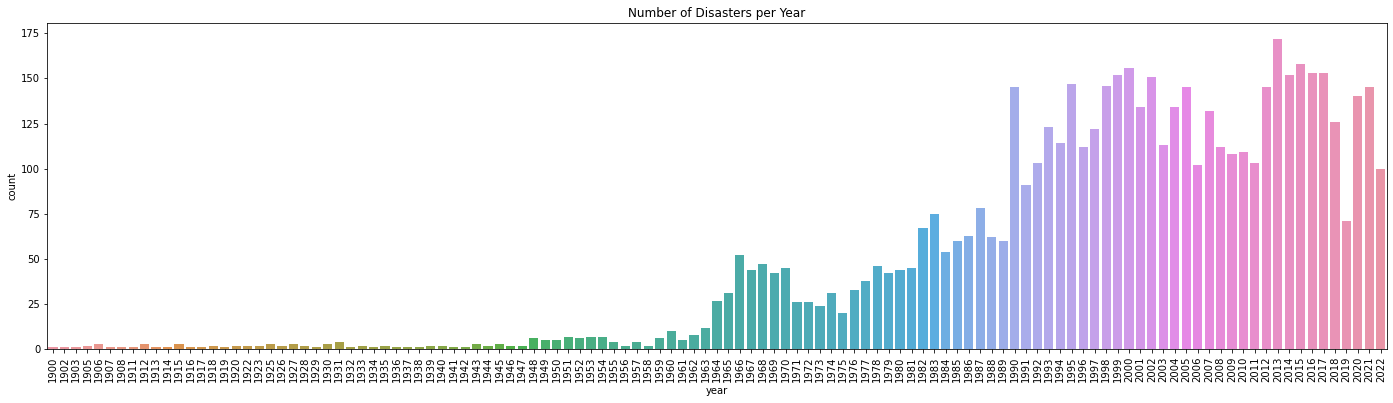

In [33]:
# b. Visualizing data with histograms, bar plots, scatter plots
    # b.1. Distribution of disasters per year:
        # The number of disasters peaked in 2013

plt.figure(figsize=(24, 6))
sns.countplot(data=df2, x='year')
plt.title('Number of Disasters per Year')
plt.xticks(rotation=90)
plt.show()

#sns.pairplot(df2)

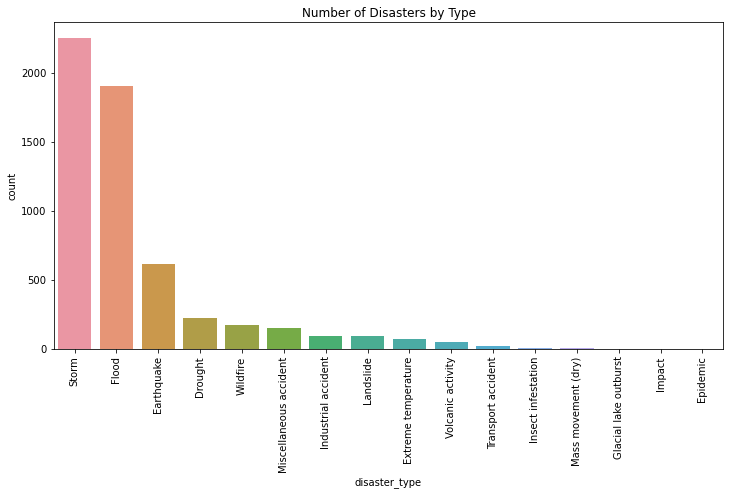

In [34]:
    # b.2. Distribution of disaster types:
        # Top 3 most frequent types of disasters are transport acccidents, floods and storms

plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='disaster_type', order=df2['disaster_type'].value_counts().index)
plt.title('Number of Disasters by Type')
plt.xticks(rotation=90)
plt.show()

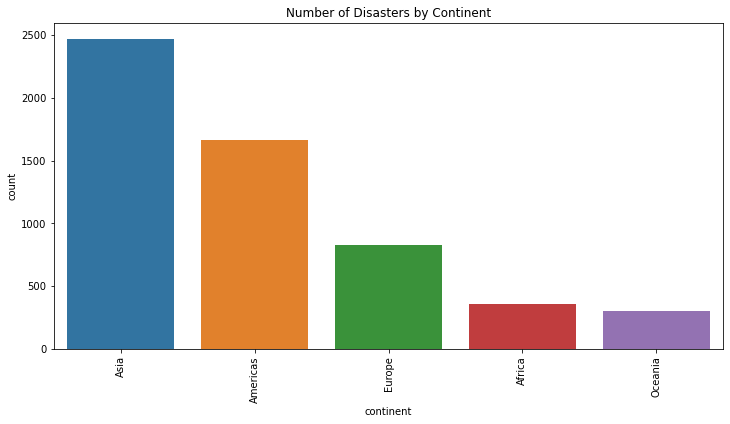

In [35]:
    # b.3. Distribution of Disasters by continent:
plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='continent', order=df2['continent'].value_counts().index)
plt.title('Number of Disasters by Continent')
plt.xticks(rotation=90)
plt.show()

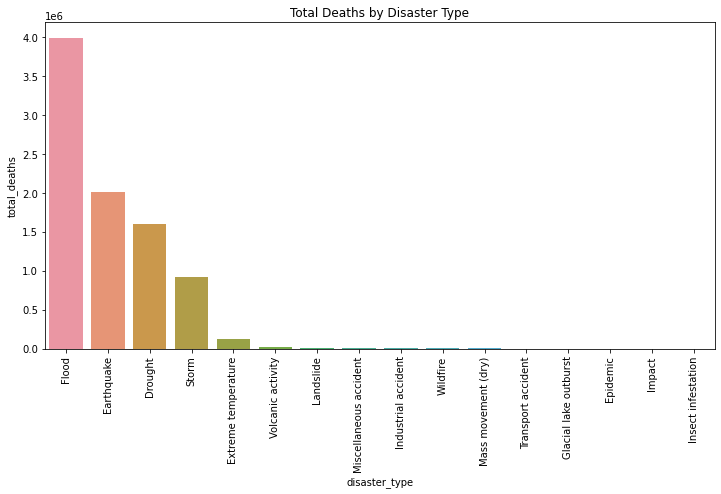

In [36]:
    # b.4. Total deaths by disaster type:
        # Floods and Earthquakes are the disasters causing a high number of deaths
plt.figure(figsize=(12, 6))
sns.barplot(data=df2, x='disaster_type', y='total_deaths', ci=None, estimator=sum, order=df2.groupby('disaster_type')['total_deaths'].sum().sort_values(ascending=False).index)
plt.title('Total Deaths by Disaster Type')
plt.xticks(rotation=90)
plt.show()

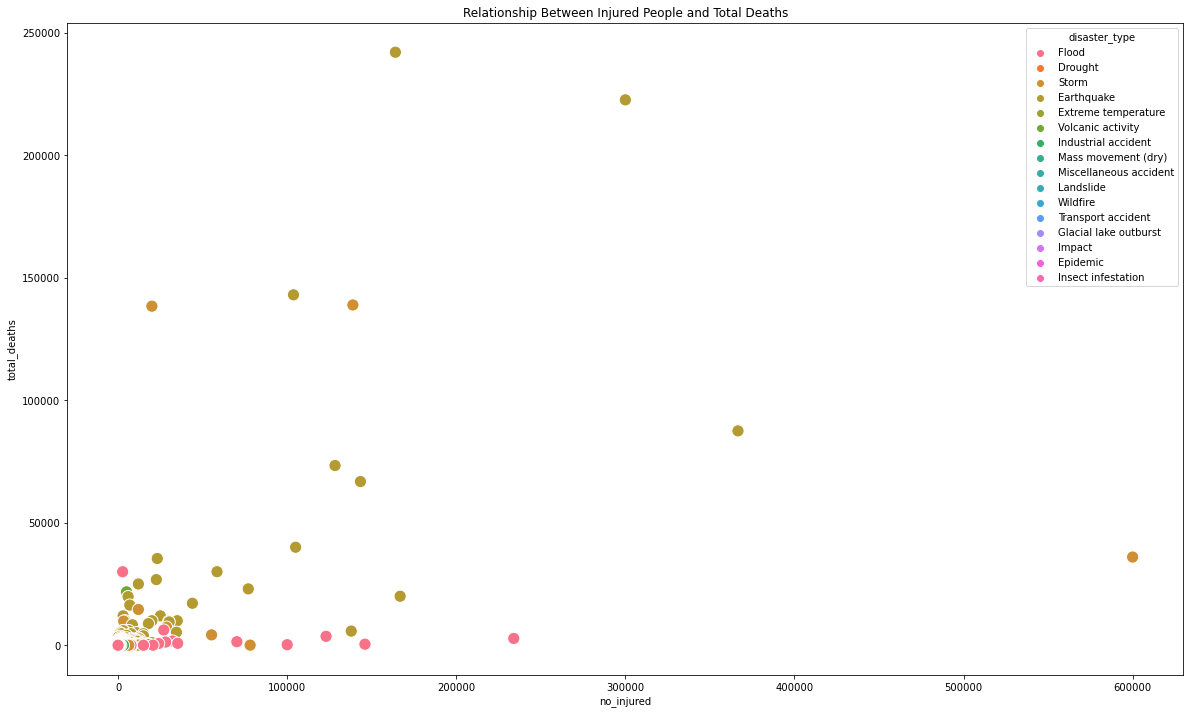

In [37]:
    # b.5. Relationship between the number of injured people and total deaths:
        # Storms seem to have caused the most amount of injuries while the total deaths are not very high.
        # Earthquakes have caused the most amount of deaths
plt.figure(figsize=(20, 12))
sns.scatterplot(data=df2, x='no_injured', y='total_deaths', hue='disaster_type', s=150)
plt.title('Relationship Between Injured People and Total Deaths')
plt.show()

C:\Users\ela.apetrei\AppData\Local\Temp\ipykernel_25968\2424755539.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


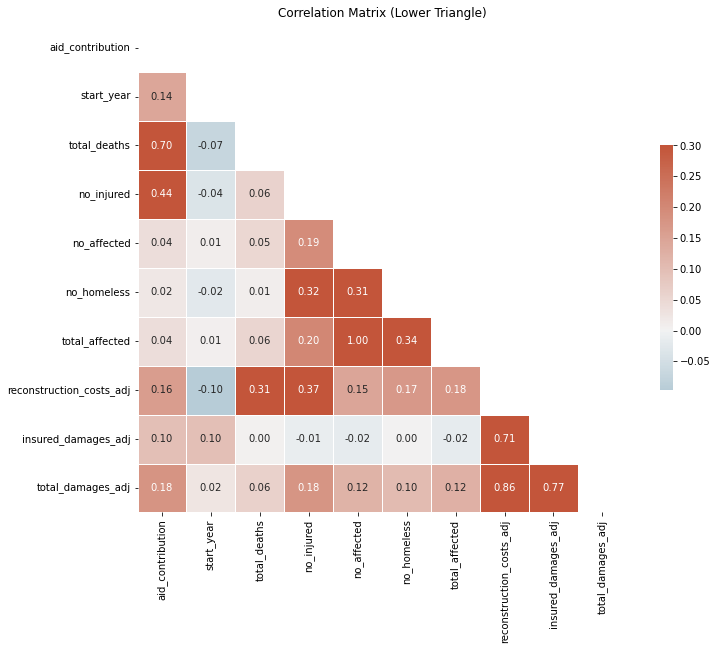

In [38]:
# c. Calculate the correlation matrix
corr = df3.corr()

    # Create a mask to hide the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

    # Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title('Correlation Matrix (Lower Triangle)')

plt.show()

In [ ]:
sns.pairplot(df3)

In [40]:
df3.describe()

,aid_contribution,start_year,total_deaths,no_injured,no_affected,no_homeless,total_affected,reconstruction_costs_adj,insured_damages_adj,total_damages_adj
count,4.770000e+02,5622.000000,5.622000e+03,5622.000000,5.622000e+03,5.622000e+03,5.622000e+03,2.700000e+01,9.190000e+02,5.622000e+03
mean,3.096246e+04,1998.363216,1.547767e+03,881.239772,1.090959e+06,2.471100e+04,1.117327e+06,4.685856e+06,1.447838e+06,1.209354e+06
std,2.147883e+05,17.674679,5.387000e+04,12509.317920,9.911231e+06,3.359932e+05,1.002458e+07,9.231627e+06,5.193985e+06,6.840173e+06
min,1.000000e+00,1900.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.897000e+03,4.600000e+01,2.000000e+00
25%,2.570000e+02,1990.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+02,1.173200e+05,9.048800e+04,1.609300e+04
50%,1.241000e+03,2001.000000,9.000000e+00,0.000000,3.000000e+03,0.000000e+00,5.937000e+03,7.312890e+05,2.962310e+05,1.181580e+05
75%,6.102000e+03,2012.000000,4.500000e+01,21.000000,8.064025e+04,0.000000e+00,1.000000e+05,4.190964e+06,9.747730e+05,5.936152e+05
max,3.518530e+06,2022.000000,3.700000e+06,600000.000000,3.300000e+08,1.585000e+07,3.300000e+08,4.392238e+07,8.991316e+07,2.732184e+08


In [50]:
df3[['year', 'disaster_group', 'disaster_subgroup', 'country', 'region', 'continent']] = df2[['year', 'disaster_group', 'disaster_subgroup', 'country', 'region', 'continent']]

### 5. Data Preprocessing:

### Plan l - Dropping Columns
Let's see how our data performs with a simple model where we remove the columns which have a high colinearity with our target but also a lot of  null values. For this purpose, we won't use any scaling methods

**a) Handling missing values:** Dropping the three columns that have high amounts as they are collerated with the target only because they reflect the reality only after the disaster has occured

**b) Encoding:** Turning our categorical variables into numerical representations

**c) Train-test split:** We will split our data into a training set and a testing set.

In [51]:
df4 = df3.copy()

In [52]:
nan_count = df4.isna().sum()
print(nan_count)

disaster_group                 0
disaster_subgroup              0
disaster_type                  0
country                        0
region                         0
continent                      0
associated_dis                 0
aid_contribution            5145
start_year                     0
total_deaths                   0
no_injured                     0
no_affected                    0
no_homeless                    0
total_affected                 0
reconstruction_costs_adj    5595
insured_damages_adj         4703
total_damages_adj              0
year                           0
dtype: int64


In [53]:
list(df4.columns)

['disaster_group',
 'disaster_subgroup',
 'disaster_type',
 'country',
 'region',
 'continent',
 'associated_dis',
 'aid_contribution',
 'start_year',
 'total_deaths',
 'no_injured',
 'no_affected',
 'no_homeless',
 'total_affected',
 'reconstruction_costs_adj',
 'insured_damages_adj',
 'total_damages_adj',
 'year']

In [54]:
# a. Dropping the columns which have a high amount of NaaN's
cols_to_drop = ["aid_contribution", "reconstruction_costs_adj", "insured_damages_adj"]
df4.drop(cols_to_drop, axis=1, inplace=True)
df4.head()    

,disaster_group,disaster_subgroup,disaster_type,country,region,continent,associated_dis,start_year,total_deaths,no_injured,no_affected,no_homeless,total_affected,total_damages_adj,year
1,Natural,Hydrological,Flood,China,Eastern Asia,Asia,Famine,1931,3700000,0,0,0,3700000,26881069.0,1931
9,Natural,Climatological,Drought,India,Southern Asia,Asia,Famine,1965,1500000,0,100000000,0,100000000,928817.0,1965
20,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,None,1970,300000,0,3648000,0,3648000,651265.0,1970
22,Natural,Geophysical,Earthquake,China,Eastern Asia,Asia,None,1976,242000,164000,0,0,164000,28798371.0,1976
23,Natural,Geophysical,Earthquake,Haiti,Caribbean,Americas,None,2010,222570,300000,3400000,0,3700000,10736894.0,2010


In [55]:
# b. Enconding

df4 = pd.get_dummies(df4, drop_first=True)
df4

,start_year,total_deaths,no_injured,no_affected,no_homeless,total_affected,total_damages_adj,year,disaster_group_Technological,disaster_subgroup_Climatological,...,associated_dis_Rain,"associated_dis_Slide (land, mud, snow, rock)",associated_dis_Snow/ice,associated_dis_Storm,associated_dis_Surge,associated_dis_Transport accident,associated_dis_Tsunami/Tidal wave,associated_dis_Volcanic activity,associated_dis_Water shortage,associated_dis_Wildfire
1,1931,3700000,0,0,0,3700000,26881069.0,1931,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1965,1500000,0,100000000,0,100000000,928817.0,1965,0,1,...,0,0,0,0,0,0,0,0,0,0
20,1970,300000,0,3648000,0,3648000,651265.0,1970,0,0,...,0,0,0,0,0,0,0,0,0,0
22,1976,242000,164000,0,0,164000,28798371.0,1976,0,0,...,0,0,0,0,0,0,0,0,0,0
23,2010,222570,300000,3400000,0,3700000,10736894.0,2010,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25874,2022,0,0,10937,0,10937,47000.0,2022,0,0,...,0,0,0,0,0,0,0,0,0,0
25876,2022,0,0,100,0,100,400.0,2022,0,0,...,0,1,0,0,0,0,0,0,0,0
25888,2022,0,0,24100000,0,24100000,640000.0,2022,0,1,...,0,0,0,0,0,0,0,0,0,0
25890,2022,0,0,0,0,0,4000000.0,2022,0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df3

,disaster_group,disaster_subgroup,disaster_type,country,region,continent,associated_dis,aid_contribution,start_year,total_deaths,no_injured,no_affected,no_homeless,total_affected,reconstruction_costs_adj,insured_damages_adj,total_damages_adj,year
1,Natural,Hydrological,Flood,China,Eastern Asia,Asia,Famine,NaN,1931,3700000,0,0,0,3700000,NaN,NaN,26881069.0,1931
9,Natural,Climatological,Drought,India,Southern Asia,Asia,Famine,NaN,1965,1500000,0,100000000,0,100000000,NaN,NaN,928817.0,1965
20,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,None,NaN,1970,300000,0,3648000,0,3648000,NaN,NaN,651265.0,1970
22,Natural,Geophysical,Earthquake,China,Eastern Asia,Asia,None,NaN,1976,242000,164000,0,0,164000,NaN,NaN,28798371.0,1976
23,Natural,Geophysical,Earthquake,Haiti,Caribbean,Americas,None,3518530.0,2010,222570,300000,3400000,0,3700000,15434285.0,268422.0,10736894.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25874,Natural,Hydrological,Flood,Bulgaria,Eastern Europe,Europe,None,NaN,2022,0,0,10937,0,10937,NaN,NaN,47000.0,2022
25876,Natural,Meteorological,Storm,Taiwan (Province of China),Eastern Asia,Asia,"Slide (land, mud, snow, rock)",NaN,2022,0,0,100,0,100,NaN,NaN,400.0,2022
25888,Natural,Climatological,Drought,Ethiopia,Eastern Africa,Africa,None,NaN,2022,0,0,24100000,0,24100000,NaN,NaN,640000.0,2022
25890,Natural,Climatological,Drought,Brazil,South America,Americas,None,NaN,2022,0,0,0,0,0,NaN,NaN,4000000.0,2022


In [57]:
# c) Train-test split for Method 1

X = df4.drop("total_damages_adj", axis=1)
y = df4["total_damages_adj"]

# train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)  

### Model 1 (Linear Regression Model)

In [58]:
# start the model
model_1 = LinearRegression()
# train the model
model_1.fit(X_train1, y_train1)

LinearRegression()

### Analyzing Results & Conclusions

In [59]:
# get predictions
predictions = model_1.predict(X_test1)

# get metrics
r2_score(y_test1, predictions), mean_absolute_error(y_test1, predictions), mean_squared_error(y_test1, predictions, squared=False)


(-85655.95950425616, 77859148.85171697, 1936950617.239616)

Based on the provided evaluation metrics, it appears that our model is performing very poorly. The R^2 score, mean absolute error (MAE), and mean squared error (MSE) suggest that the model's predictions are far off from the actual values.

**R^2 score:** The R^2 (coefficient of determination) score ranges from -∞ to 1, where 1 indicates a perfect fit and 0 indicates that the model is no better than predicting the mean value. An R^2 score of -85,655.9595 implies that the model is performing significantly worse than a simple mean-based model. A score closer to 1 would indicate a better fit.

**Mean Absolute Error (MAE):** The MAE of 77,859,148.85 indicates that, on average, the predictions are off by a large margin, suggesting that our model is not capturing the underlying relationships in the data.

**Mean Squared Error (MSE):** The MSE measures the average squared difference between predicted and actual values. An MSE of 1,936,950,617.24 also suggests that the model's predictions have a large squared difference from the actual values, which is undesirable.

### Plan ll - Simple Imputer + Standard Scaler
**a) Handling missing values:** Imputing missing values using SimpleImputer for "aid_contribution", "reconstruction_costs_adj", "insured_damages_adj".

**b) Encoding:** Turning our categorical variables into numerical representations

**c) Train-test split:** We will split our data into a training set and a testing set.

**d) Feature scaling - Standard Scaler:** In our data description we can see that the values have a wide range of values (e.g. AID contribution has a minimum value of 1 and a max of 3,518,530). We will use StandardScaler as our data (possibly) has a lot of outliers and it is less sensitive to them

In [60]:
df5 = df3.copy()

In [61]:
list(df5.columns)

['disaster_group',
 'disaster_subgroup',
 'disaster_type',
 'country',
 'region',
 'continent',
 'associated_dis',
 'aid_contribution',
 'start_year',
 'total_deaths',
 'no_injured',
 'no_affected',
 'no_homeless',
 'total_affected',
 'reconstruction_costs_adj',
 'insured_damages_adj',
 'total_damages_adj',
 'year']

In [62]:
# a) Handling missing values (SimpleImputer - mean):

import pandas as pd
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with the 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# List of columns to impute
columns_to_impute = ['aid_contribution', 'reconstruction_costs_adj', 'insured_damages_adj']

# Fit the SimpleImputer to the relevant columns and transform them
imputed_values = imputer.fit_transform(df5[columns_to_impute])

# Replace the original columns with the imputed ones
df5[columns_to_impute] = imputed_values


In [63]:
df5

,disaster_group,disaster_subgroup,disaster_type,country,region,continent,associated_dis,aid_contribution,start_year,total_deaths,no_injured,no_affected,no_homeless,total_affected,reconstruction_costs_adj,insured_damages_adj,total_damages_adj,year
1,Natural,Hydrological,Flood,China,Eastern Asia,Asia,Famine,3.096246e+04,1931,3700000,0,0,0,3700000,4.685856e+06,1.447838e+06,26881069.0,1931
9,Natural,Climatological,Drought,India,Southern Asia,Asia,Famine,3.096246e+04,1965,1500000,0,100000000,0,100000000,4.685856e+06,1.447838e+06,928817.0,1965
20,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,None,3.096246e+04,1970,300000,0,3648000,0,3648000,4.685856e+06,1.447838e+06,651265.0,1970
22,Natural,Geophysical,Earthquake,China,Eastern Asia,Asia,None,3.096246e+04,1976,242000,164000,0,0,164000,4.685856e+06,1.447838e+06,28798371.0,1976
23,Natural,Geophysical,Earthquake,Haiti,Caribbean,Americas,None,3.518530e+06,2010,222570,300000,3400000,0,3700000,1.543428e+07,2.684220e+05,10736894.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25874,Natural,Hydrological,Flood,Bulgaria,Eastern Europe,Europe,None,3.096246e+04,2022,0,0,10937,0,10937,4.685856e+06,1.447838e+06,47000.0,2022
25876,Natural,Meteorological,Storm,Taiwan (Province of China),Eastern Asia,Asia,"Slide (land, mud, snow, rock)",3.096246e+04,2022,0,0,100,0,100,4.685856e+06,1.447838e+06,400.0,2022
25888,Natural,Climatological,Drought,Ethiopia,Eastern Africa,Africa,None,3.096246e+04,2022,0,0,24100000,0,24100000,4.685856e+06,1.447838e+06,640000.0,2022
25890,Natural,Climatological,Drought,Brazil,South America,Americas,None,3.096246e+04,2022,0,0,0,0,0,4.685856e+06,1.447838e+06,4000000.0,2022


In [64]:
nan_count = df5.isna().sum()
print(nan_count)

disaster_group              0
disaster_subgroup           0
disaster_type               0
country                     0
region                      0
continent                   0
associated_dis              0
aid_contribution            0
start_year                  0
total_deaths                0
no_injured                  0
no_affected                 0
no_homeless                 0
total_affected              0
reconstruction_costs_adj    0
insured_damages_adj         0
total_damages_adj           0
year                        0
dtype: int64


In [65]:
# b) Encoding
df5 = pd.get_dummies(df5, drop_first=True)
df5

,aid_contribution,start_year,total_deaths,no_injured,no_affected,no_homeless,total_affected,reconstruction_costs_adj,insured_damages_adj,total_damages_adj,...,associated_dis_Rain,"associated_dis_Slide (land, mud, snow, rock)",associated_dis_Snow/ice,associated_dis_Storm,associated_dis_Surge,associated_dis_Transport accident,associated_dis_Tsunami/Tidal wave,associated_dis_Volcanic activity,associated_dis_Water shortage,associated_dis_Wildfire
1,3.096246e+04,1931,3700000,0,0,0,3700000,4.685856e+06,1.447838e+06,26881069.0,...,0,0,0,0,0,0,0,0,0,0
9,3.096246e+04,1965,1500000,0,100000000,0,100000000,4.685856e+06,1.447838e+06,928817.0,...,0,0,0,0,0,0,0,0,0,0
20,3.096246e+04,1970,300000,0,3648000,0,3648000,4.685856e+06,1.447838e+06,651265.0,...,0,0,0,0,0,0,0,0,0,0
22,3.096246e+04,1976,242000,164000,0,0,164000,4.685856e+06,1.447838e+06,28798371.0,...,0,0,0,0,0,0,0,0,0,0
23,3.518530e+06,2010,222570,300000,3400000,0,3700000,1.543428e+07,2.684220e+05,10736894.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25874,3.096246e+04,2022,0,0,10937,0,10937,4.685856e+06,1.447838e+06,47000.0,...,0,0,0,0,0,0,0,0,0,0
25876,3.096246e+04,2022,0,0,100,0,100,4.685856e+06,1.447838e+06,400.0,...,0,1,0,0,0,0,0,0,0,0
25888,3.096246e+04,2022,0,0,24100000,0,24100000,4.685856e+06,1.447838e+06,640000.0,...,0,0,0,0,0,0,0,0,0,0
25890,3.096246e+04,2022,0,0,0,0,0,4.685856e+06,1.447838e+06,4000000.0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# c) Train-test split for Method 2

X2 = df5.drop("total_damages_adj", axis=1)
y2 = df5["total_damages_adj"]

# train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)  

In [67]:
X2_num = X2.select_dtypes(include = np.number)
X2_cat = X2.select_dtypes(include = np.object)

C:\Users\ela.apetrei\AppData\Local\Temp\ipykernel_25968\437708549.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X2_cat = X2.select_dtypes(include = np.object)


In [68]:
# using standard scaler
transformer = StandardScaler() # StandardScaler and MinMax scaler works row wise,
# so make sure you do the train-test split first (optional)
# (train-test split comes first, or else your trainning set will carry information from your test set)
transformer.fit(X2_num)

x_standardized = transformer.transform(X2_num)
x_standardized#.shape
#pd.DataFrame(x_standardized)

array([[-5.82091714e-17, -3.81162262e+00,  6.86612481e+01, ...,
        -1.88645669e-02, -4.00427351e-02, -2.98354636e-02],
       [-5.82091714e-17, -1.88779569e+00,  2.78185560e+01, ...,
        -1.88645669e-02, -4.00427351e-02, -2.98354636e-02],
       [-5.82091714e-17, -1.60487996e+00,  5.54072393e+00, ...,
        -1.88645669e-02, -4.00427351e-02, -2.98354636e-02],
       ...,
       [-5.82091714e-17,  1.33744358e+00, -2.87340775e-02, ...,
        -1.88645669e-02, -4.00427351e-02, -2.98354636e-02],
       [-5.82091714e-17,  1.33744358e+00, -2.87340775e-02, ...,
        -1.88645669e-02, -4.00427351e-02, -2.98354636e-02],
       [-5.82091714e-17,  1.33744358e+00, -2.87340775e-02, ...,
        -1.88645669e-02, -4.00427351e-02, -2.98354636e-02]])

### Model 2 (Linear Regression Model)

In [69]:
# Start the model 2
model_2 = LinearRegression()
# Train the model 2
model_2.fit(X_train2, y_train2)

# Evaluate the model with Method 2
score_2 = model_2.score(X_test2, y_test2)

### Analyzing Results & Conclusions

In [70]:
# Get predictions
predictions2 = model_2.predict(X_test2)

# Get metrics
r2_score(y_test2, predictions2), mean_absolute_error(y_test2, predictions2), mean_squared_error(y_test2, predictions2, squared=False)

(-24137.60024804219, 45049101.4845995, 1028237083.0192527)

Still not great when compared to Model 1.
We can see an improvement in R2_score and a slight one in Mean Squared Error and also on Mean absolute error but not enough,


**R2_score:** A negative R² score, like -24,137.60024804219, indicates that the model is performing worse than a simple mean-based model. This is a clear sign that the model is not fitting the data properly

**Mean_absolute_error (MAE):** The MAE is 450,491,01.4845995, which is very high. This suggests that our model is making large errors in its predictions, and its predictions are far from the actual values.

**Mean_squared_error (MSE):** The MSE is 1,028,237,083.0192527, which is also a very high value. This indicates that our model is making large errors in its predictions, which are further magnified by the squaring operation.

### Plan lll - IterativeImputer + FeatureScaling (Normalization)

**a) Handling missing values:** Imputing missing values using IterativeImputer for "aid_contribution", "reconstruction_costs_adj", "insured_damages_adj". I chose this method because it's more suitable for a high number of missing values as I have

**b) Encoding:** Turning our categorical variables into numerical representations

**c) Train-test split:** We will split our data into a training set and a testing set.

**d) Feature scaling:** In our data description we can see that the values have a wide range of values (e.g. AID contribution has a minimum value of 1 and a max of 3,518,530). We will use StandardScaler as our data (possibly) has a lot of outliers and it is less sensitive to them

In [71]:
df6 = df3.copy()

In [72]:
# a) Handling missing values (IterativeImputer)

# Creating an instance of IterativeImputer with the desired settings
imputer = IterativeImputer(initial_strategy='median', max_iter=100, random_state=0)

# Subsetting the dataframe to only include the columns of interest
cols_to_impute = ['aid_contribution',
                  'reconstruction_costs_adj',
                  'insured_damages_adj']

# Fitting the imputer to the data and transform it to impute the missing values
imputed_data = imputer.fit_transform(df6[cols_to_impute])

# Converting the imputed data back to a pandas dataframe and assign column names
#df_imputed = pd.DataFrame(imputed_data, columns=cols_to_impute)

# Replacing the original missing values with the imputed values in the original dataframe
df6[cols_to_impute] = imputed_data


In [74]:
nan_count = df6.isna().sum()
print(nan_count)

disaster_group              0
disaster_subgroup           0
disaster_type               0
country                     0
region                      0
continent                   0
associated_dis              0
aid_contribution            0
start_year                  0
total_deaths                0
no_injured                  0
no_affected                 0
no_homeless                 0
total_affected              0
reconstruction_costs_adj    0
insured_damages_adj         0
total_damages_adj           0
year                        0
dtype: int64


In [76]:
# b) Encoding
df6 = pd.get_dummies(df6, drop_first=True)
df6

,aid_contribution,start_year,total_deaths,no_injured,no_affected,no_homeless,total_affected,reconstruction_costs_adj,insured_damages_adj,total_damages_adj,...,associated_dis_Rain,"associated_dis_Slide (land, mud, snow, rock)",associated_dis_Snow/ice,associated_dis_Storm,associated_dis_Surge,associated_dis_Transport accident,associated_dis_Tsunami/Tidal wave,associated_dis_Volcanic activity,associated_dis_Water shortage,associated_dis_Wildfire
1,1.675302e+04,1931,3700000,0,0,0,3700000,1.474057e+07,1.430326e+06,26881069.0,...,0,0,0,0,0,0,0,0,0,0
9,1.675302e+04,1965,1500000,0,100000000,0,100000000,1.474057e+07,1.430326e+06,928817.0,...,0,0,0,0,0,0,0,0,0,0
20,1.675302e+04,1970,300000,0,3648000,0,3648000,1.474057e+07,1.430326e+06,651265.0,...,0,0,0,0,0,0,0,0,0,0
22,1.675302e+04,1976,242000,164000,0,0,164000,1.474057e+07,1.430326e+06,28798371.0,...,0,0,0,0,0,0,0,0,0,0
23,3.518530e+06,2010,222570,300000,3400000,0,3700000,1.543428e+07,2.684220e+05,10736894.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25874,1.675302e+04,2022,0,0,10937,0,10937,1.474057e+07,1.430326e+06,47000.0,...,0,0,0,0,0,0,0,0,0,0
25876,1.675302e+04,2022,0,0,100,0,100,1.474057e+07,1.430326e+06,400.0,...,0,1,0,0,0,0,0,0,0,0
25888,1.675302e+04,2022,0,0,24100000,0,24100000,1.474057e+07,1.430326e+06,640000.0,...,0,0,0,0,0,0,0,0,0,0
25890,1.675302e+04,2022,0,0,0,0,0,1.474057e+07,1.430326e+06,4000000.0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# c) Train-test split for Method 3

X3 = df6.drop("total_damages_adj", axis=1)
y3 = df6["total_damages_adj"]



In [81]:
# Splitting the numerical and categoricals for Normalizing

X_num3 = X3.select_dtypes(include = np.number)
X_cat3 = X3.select_dtypes(include = np.object)

C:\Users\ela.apetrei\AppData\Local\Temp\ipykernel_25968\2780044909.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat3 = X3.select_dtypes(include = np.object)


In [83]:
X_num3

,aid_contribution,start_year,total_deaths,no_injured,no_affected,no_homeless,total_affected,reconstruction_costs_adj,insured_damages_adj,year,...,associated_dis_Rain,"associated_dis_Slide (land, mud, snow, rock)",associated_dis_Snow/ice,associated_dis_Storm,associated_dis_Surge,associated_dis_Transport accident,associated_dis_Tsunami/Tidal wave,associated_dis_Volcanic activity,associated_dis_Water shortage,associated_dis_Wildfire
1,1.675302e+04,1931,3700000,0,0,0,3700000,1.474057e+07,1.430326e+06,1931,...,0,0,0,0,0,0,0,0,0,0
9,1.675302e+04,1965,1500000,0,100000000,0,100000000,1.474057e+07,1.430326e+06,1965,...,0,0,0,0,0,0,0,0,0,0
20,1.675302e+04,1970,300000,0,3648000,0,3648000,1.474057e+07,1.430326e+06,1970,...,0,0,0,0,0,0,0,0,0,0
22,1.675302e+04,1976,242000,164000,0,0,164000,1.474057e+07,1.430326e+06,1976,...,0,0,0,0,0,0,0,0,0,0
23,3.518530e+06,2010,222570,300000,3400000,0,3700000,1.543428e+07,2.684220e+05,2010,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25874,1.675302e+04,2022,0,0,10937,0,10937,1.474057e+07,1.430326e+06,2022,...,0,0,0,0,0,0,0,0,0,0
25876,1.675302e+04,2022,0,0,100,0,100,1.474057e+07,1.430326e+06,2022,...,0,1,0,0,0,0,0,0,0,0
25888,1.675302e+04,2022,0,0,24100000,0,24100000,1.474057e+07,1.430326e+06,2022,...,0,0,0,0,0,0,0,0,0,0
25890,1.675302e+04,2022,0,0,0,0,0,1.474057e+07,1.430326e+06,2022,...,0,0,0,0,0,0,0,0,0,0


In [85]:
import pickle

# Normalizing data
transformer = Normalizer() # Normalizer works column wise, so don't use it on the target 
# (X-y split comes first, or else your features will carry information from the target)
transformer.fit(X_num3) # you'll always only fit on the trainning data

# When Normalizing with encoded categorical data, you'll lose some information on the categories.
# When Normalizing only numericals, you'll be losing proportion between numericals and encoded categories.

with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)

with open('transformer.pkl', 'rb') as file:
    transformer = pickle.load(file)

x_normalized = transformer.transform(X_num3)
#pd.DataFrame(x_normalized)
x_normalized.shape

(5622, 292)

In [87]:
#concatenate x_
x = np.concatenate([x_normalized, X_cat3], axis = 1)

In [88]:
# train-test split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)  

### Model 3 (Linear Regression Model)

In [89]:
# Start the model 3
model_3 = LinearRegression()
# Train the model 3
model_3.fit(X_train3, y_train3)

# Evaluate the model with Method 2
score_3 = model_3.score(X_test3, y_test3)

### Analyzing Results & Conclusions

In [90]:
# Get predictions
predictions3 = model_3.predict(X_test3)

# Get metrics
r2_score(y_test3, predictions3), mean_absolute_error(y_test3, predictions3), mean_squared_error(y_test3, predictions3, squared=False)

(-3329.5328144117852, 15569532.283272859, 381939064.19705915)

In [91]:
# Still not great. Thank you!